In [2]:
import numpy as np
import pandas as pd
import re
import sys
sys.path.insert(0, "/home/user/project/python/reduce_nsp")
from nsp.utils import save_fig
from matplotlib.lines import Line2D
from matplotlib import pyplot as plt

In [16]:
def process_line_SS(stdout):
    energy = []
    cq = []
    susc = []
    sign = []
    time = []
    dimer = []
    weight_r = []
    
    for line in stdout.split("\n"):
        pat = "Total Energy"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            energy = [float(line[0]), float(line[1])]

        pat = "specific heat"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            cq = [float(line[0]), float(line[1])]
        
        pat = "susceptibility"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            susc = [float(line[0]), float(line[1])]

        pat = "average sign"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            sign = [float(line[0]), float(line[1])]

        pat = "Elapsed time"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.replace("sec","")
            time = [float(line)]
            

            
    return energy, cq, susc, sign, time

In [27]:
import os
df = {}
df_cq = {}
df_susc = {}
df_ene = {}
folder_path = "/home/user/project/python/make_local/out/SS"
M = 240
lats = ["singlet"]

files = []
Js = np.arange(0.47, 0.5, 0.005)
T =  np.logspace(-1, 0, num=15)
N = 1000000; L = 4


In [28]:
for lat in lats:
    df[lat] = {}
    df_ene[lat] = {}
    df_cq[lat] = {}
    df_susc[lat] = {}
    
    for J in Js:
        df[lat][np.round(J,3)] = {}
        df_ene[lat][np.round(J,3)] = {}
        df_cq[lat][np.round(J,3)] = {}
        df_susc[lat][np.round(J,3)] = {}
        
        for t in T:
            if lat is "dimer_optim":
                file_name = f"{lat}_L_[{L},{L}]_J_[{J:.3},1]_T_{t:.5}_N_{N}_M_{M}"
            else:
                file_name = f"{lat}_L_[{L},{L}]_J_[{J:.3},1]_T_{t:.5}_N_{N}"
            with open(folder_path+ "/" + file_name, "r") as f:
                a = f.read()
                try:
                    energy, cq, susc, sign, time = process_line_SS(a)
                    df[lat][np.round(J,3)][t] = sign[0]
                    df_ene[lat][np.round(J,3)][t] = energy[0]
                    df_cq[lat][np.round(J,3)][t] = cq[0]
                    df_susc[lat][np.round(J,3)][t] = susc[0]
                    
                except:
#                     print(a)
                    print(file_name)

<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_12344/3242159488.py:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if lat is "dimer_optim":


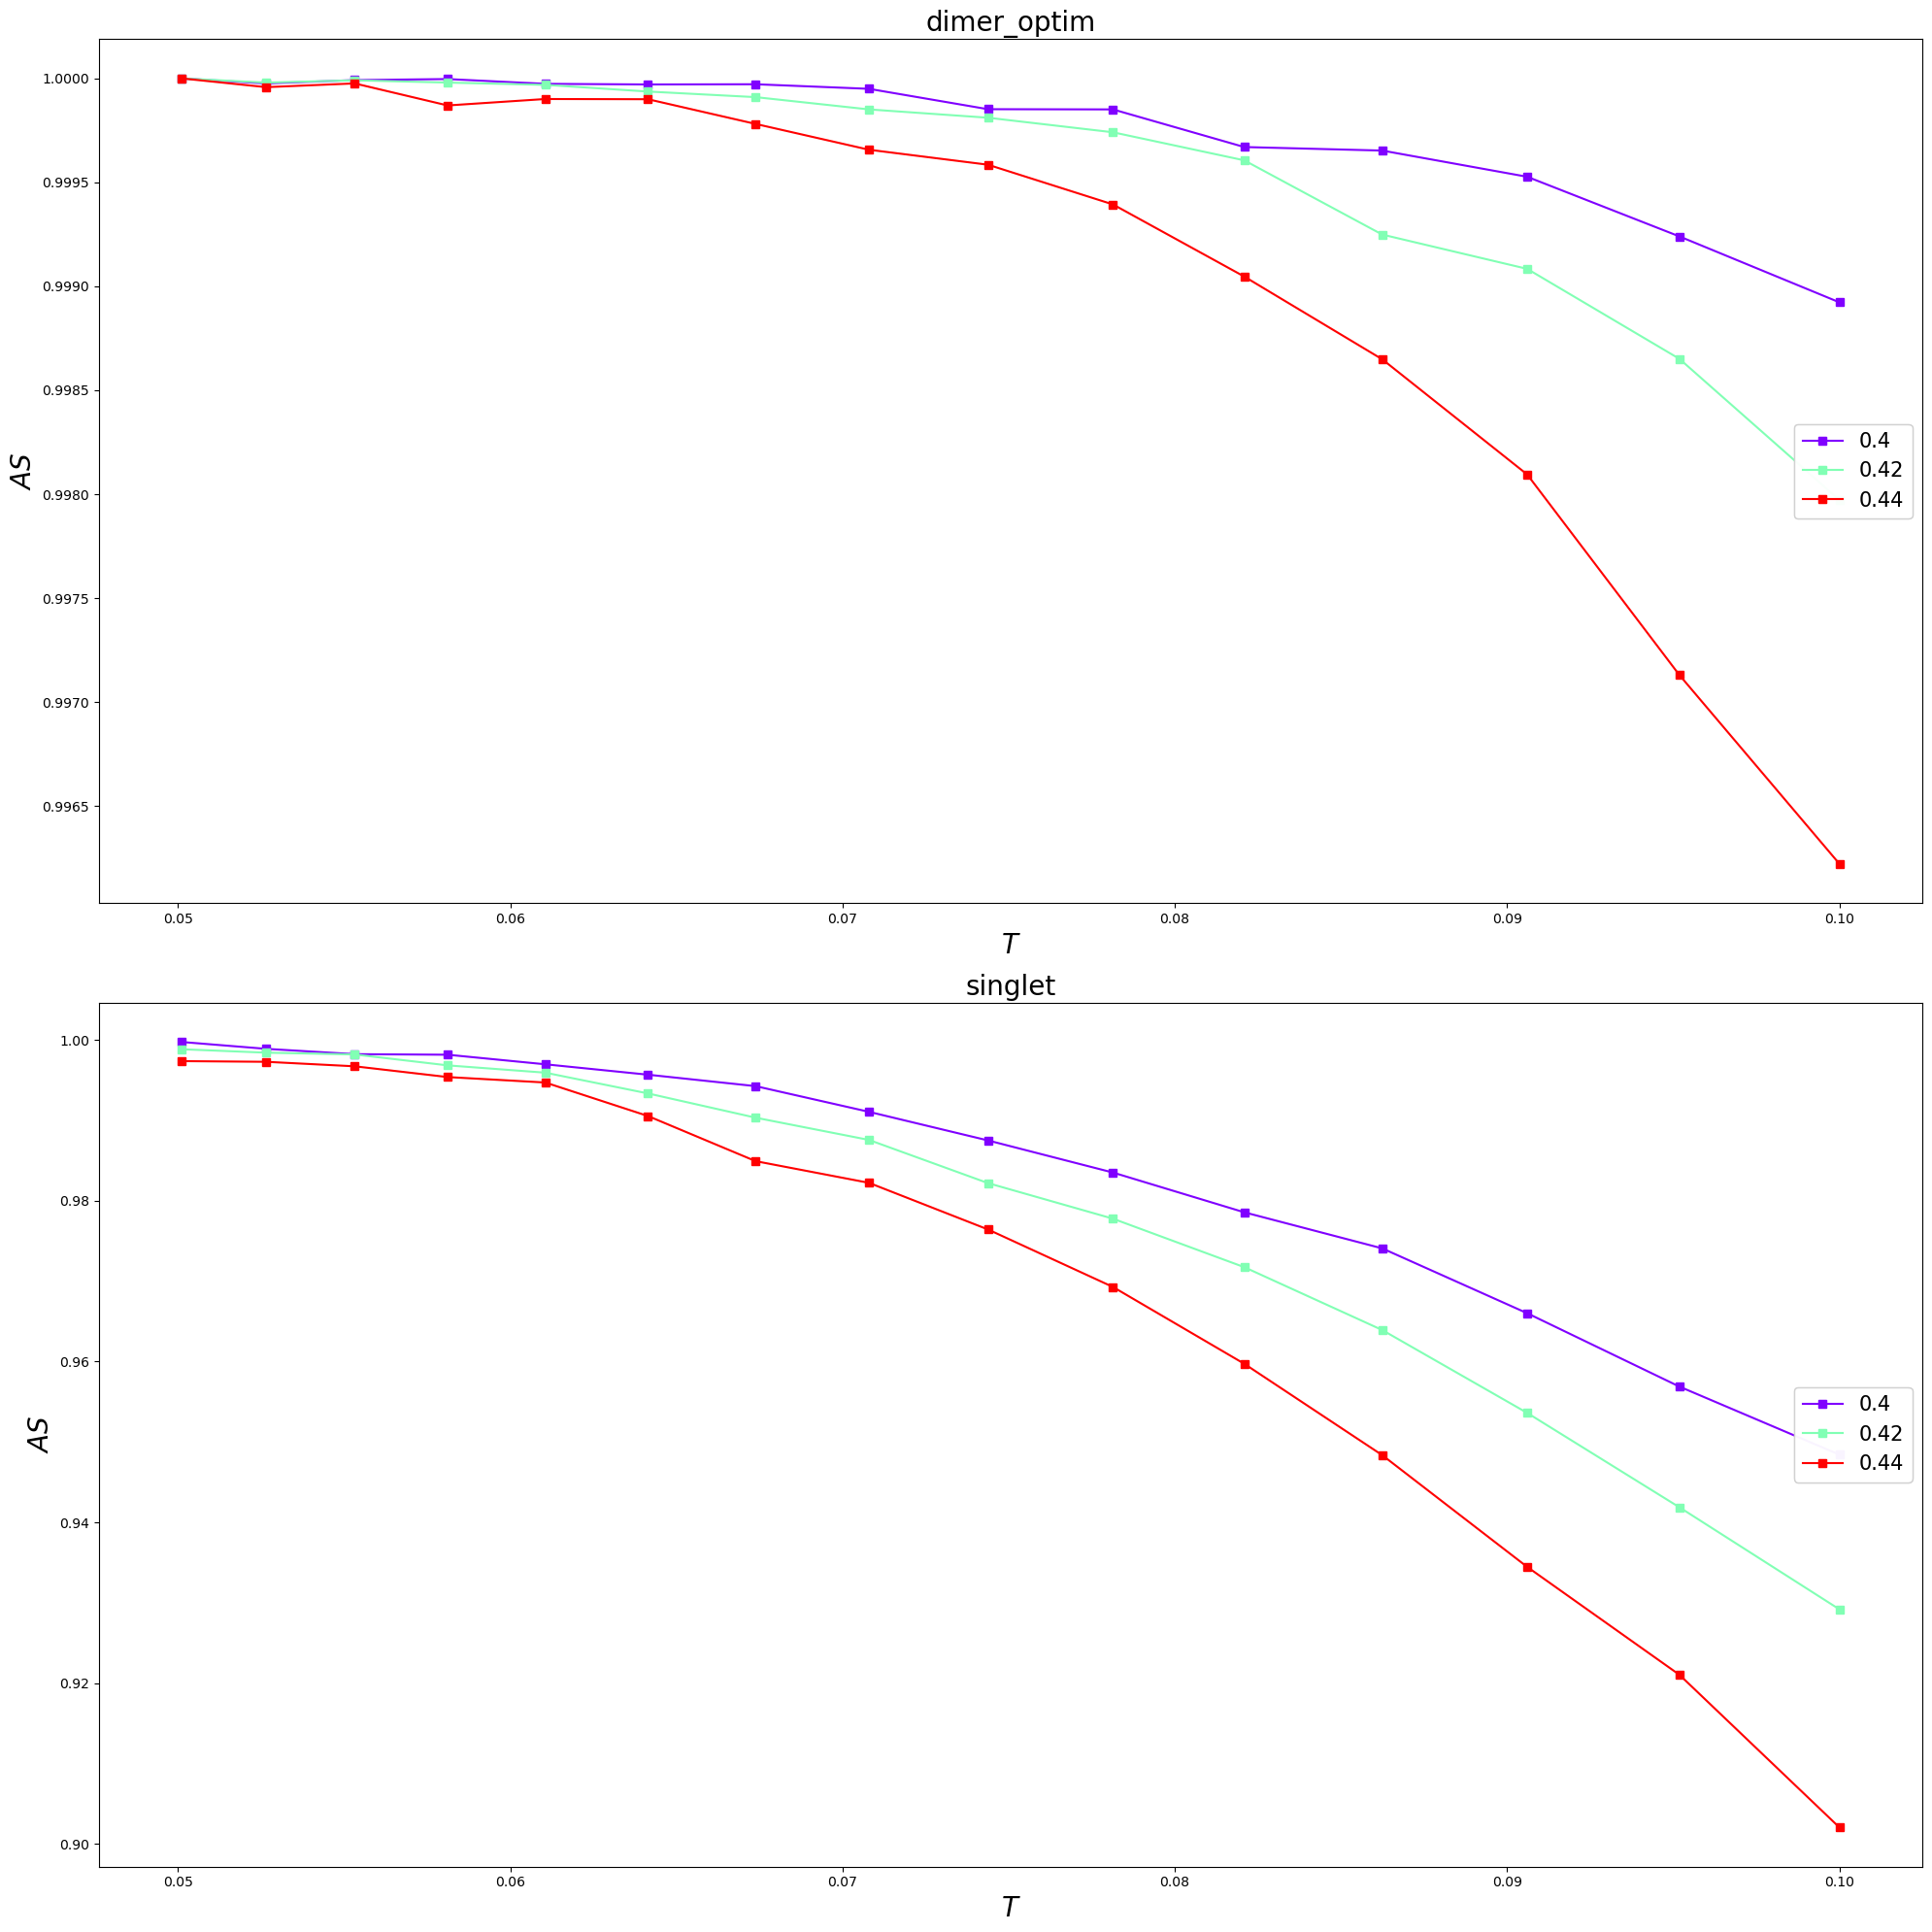

In [25]:
dfs = {lat : pd.DataFrame(df[lat]) for lat in lats}
for key in dfs.keys():
    dfs[key].columns = np.round(dfs[key].columns, 3)



fig, ax = plt.subplots(2, 1, figsize=(20, 20))
# lat = "dimer_optim"
# J_list = [Js[0]-1E-4, Js[-1]+1E-4]
# gap = 1
# p1 = dfs[lat].plot(y = [(elem) for elem in dfs[lat].columns[::gap] if J_list[0] < elem <= J_list[1]],
#                         ax = ax[0], style='s-', colormap='rainbow')
# leg = ax[0].legend(handles=p1.legend().legendHandles, fontsize=15, loc="center right")
# ax[0].add_artist(leg)
# ax[0].set_xlabel(r'$T$', fontsize=20)
# ax[0].set_ylabel(r'$AS$', fontsize=20)
# ax[0].set_title("dimer_optim", fontsize=20)

lat = "singlet"
p1 = dfs[lat].plot(y = [(elem) for elem in dfs[lat].columns[::gap] if J_list[0] < elem <= J_list[1]],
                        ax = ax[1], style='s-', colormap='rainbow')
leg = ax[1].legend(handles=p1.legend().legendHandles, fontsize=15, loc="center right")
ax[1].add_artist(leg)
ax[1].set_xlabel(r'$T$', fontsize=20)
ax[1].set_ylabel(r'$AS$', fontsize=20)
ax[1].set_title("singlet", fontsize=20)
save_fig(fig,f"images/SS", f"L_{L}_J_[{J_list[0]:.3},{J_list[1]:.3},J]_T_[{T[0]:.3},{T[-1]:.3}]_gap_{Js[gap] - Js[0]:.2}_N_{N}", 400, overwrite = True)

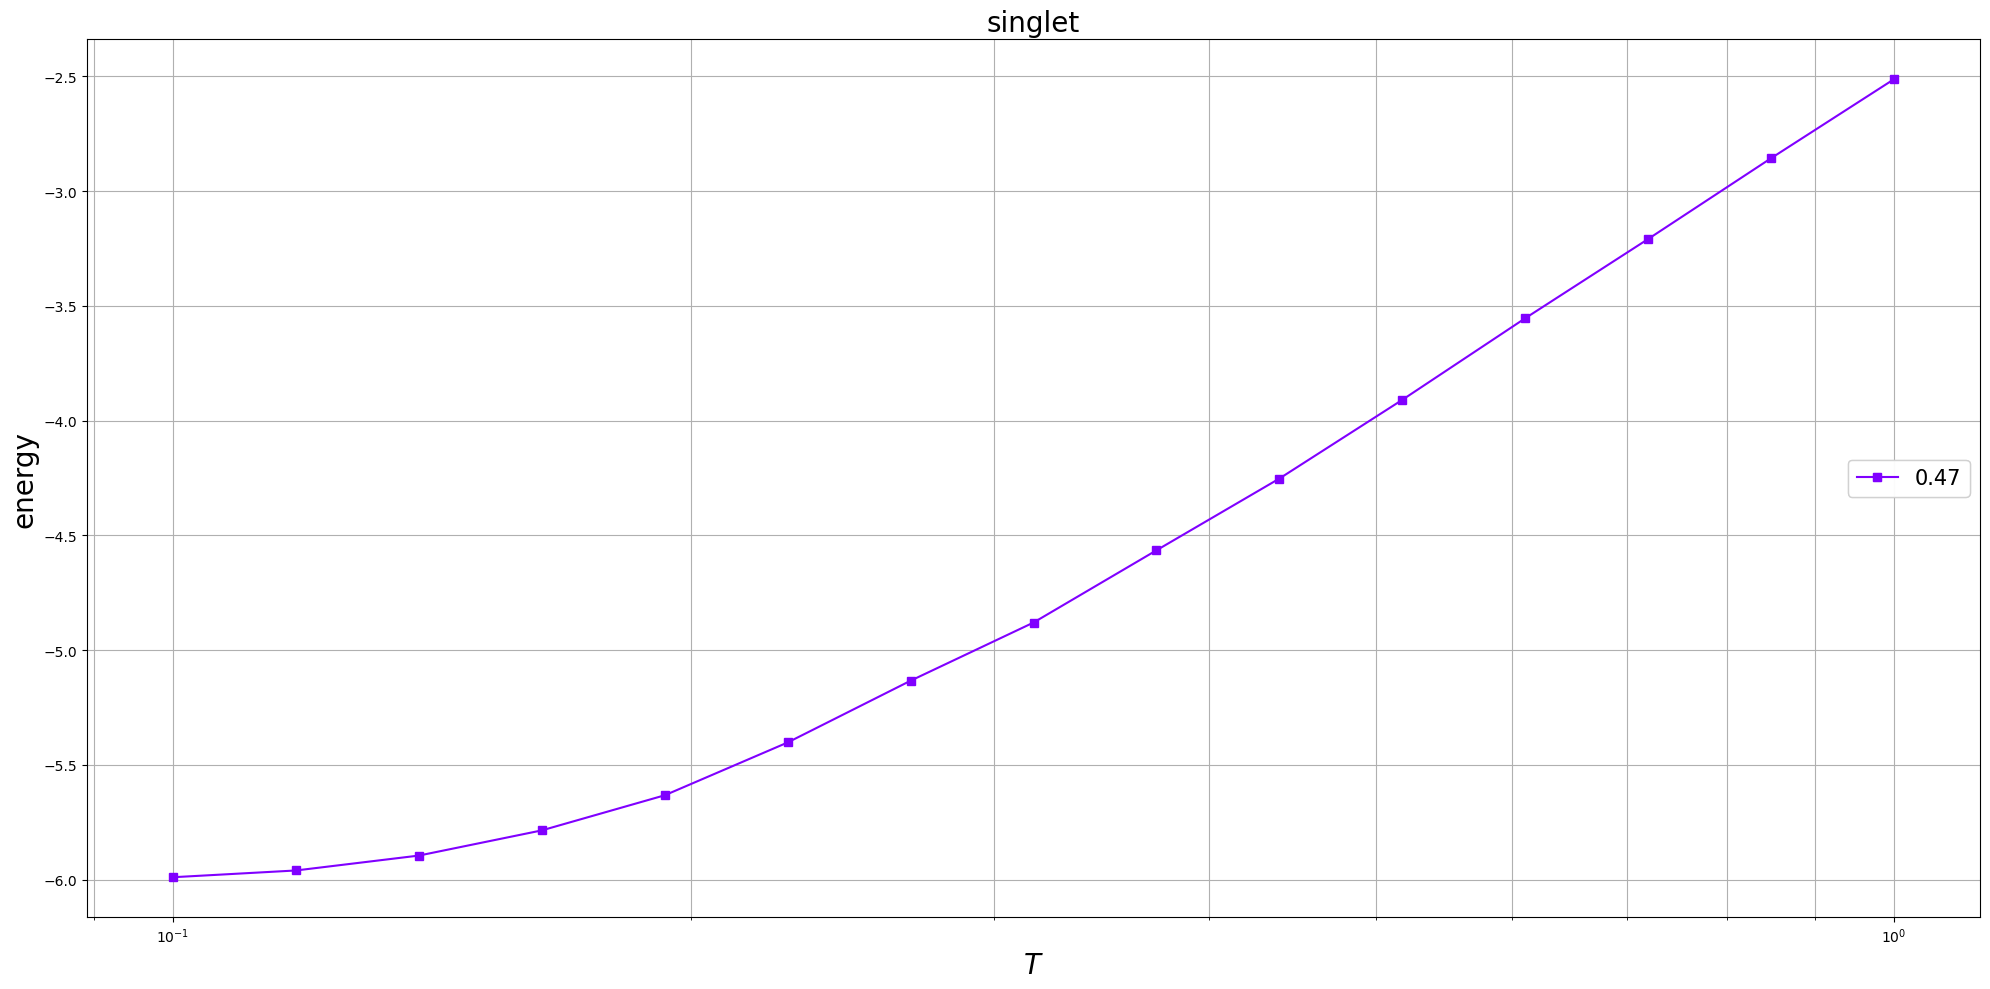

In [67]:
dfs = {lat : pd.DataFrame(df_ene[lat]) for lat in lats}
for key in dfs.keys():
    dfs[key].columns = np.round(dfs[key].columns, 3)



fig, ax = plt.subplots(1, 1, figsize=(20, 10))
# lat = "dimer_optim"
# J_list = [Js[0]-1E-4, Js[-1]+1E-4]
# gap = 1
# p1 = dfs[lat].plot(y = [(elem) for elem in dfs[lat].columns[::gap] if J_list[0] < elem <= J_list[1]],
#                         ax = ax[0], style='s-', colormap='rainbow')
# leg = ax[0].legend(handles=p1.legend().legendHandles, fontsize=15, loc="center right")
# ax[0].add_artist(leg)
# ax[0].set_xlabel(r'$T$', fontsize=20)
# ax[0].set_ylabel(r'$AS$', fontsize=20)
# ax[0].set_title("dimer_optim", fontsize=20)

lat = "singlet"
p1 = dfs[lat].plot(y=0.47 ,ax = ax, style='s-', colormap='rainbow')
leg = ax.legend(handles=p1.legend().legendHandles, fontsize=15, loc="center right")
ax.add_artist(leg)
ax.set_xscale("log")
ax.set_xlabel(r'$T$', fontsize=20)
ax.set_ylabel(r'energy', fontsize=20)
ax.set_title("singlet", fontsize=20)
ax.grid(which="both", ls="-")
save_fig(fig,f"images/SS", f"singlet_ene_J_0.47", 400, overwrite = True)

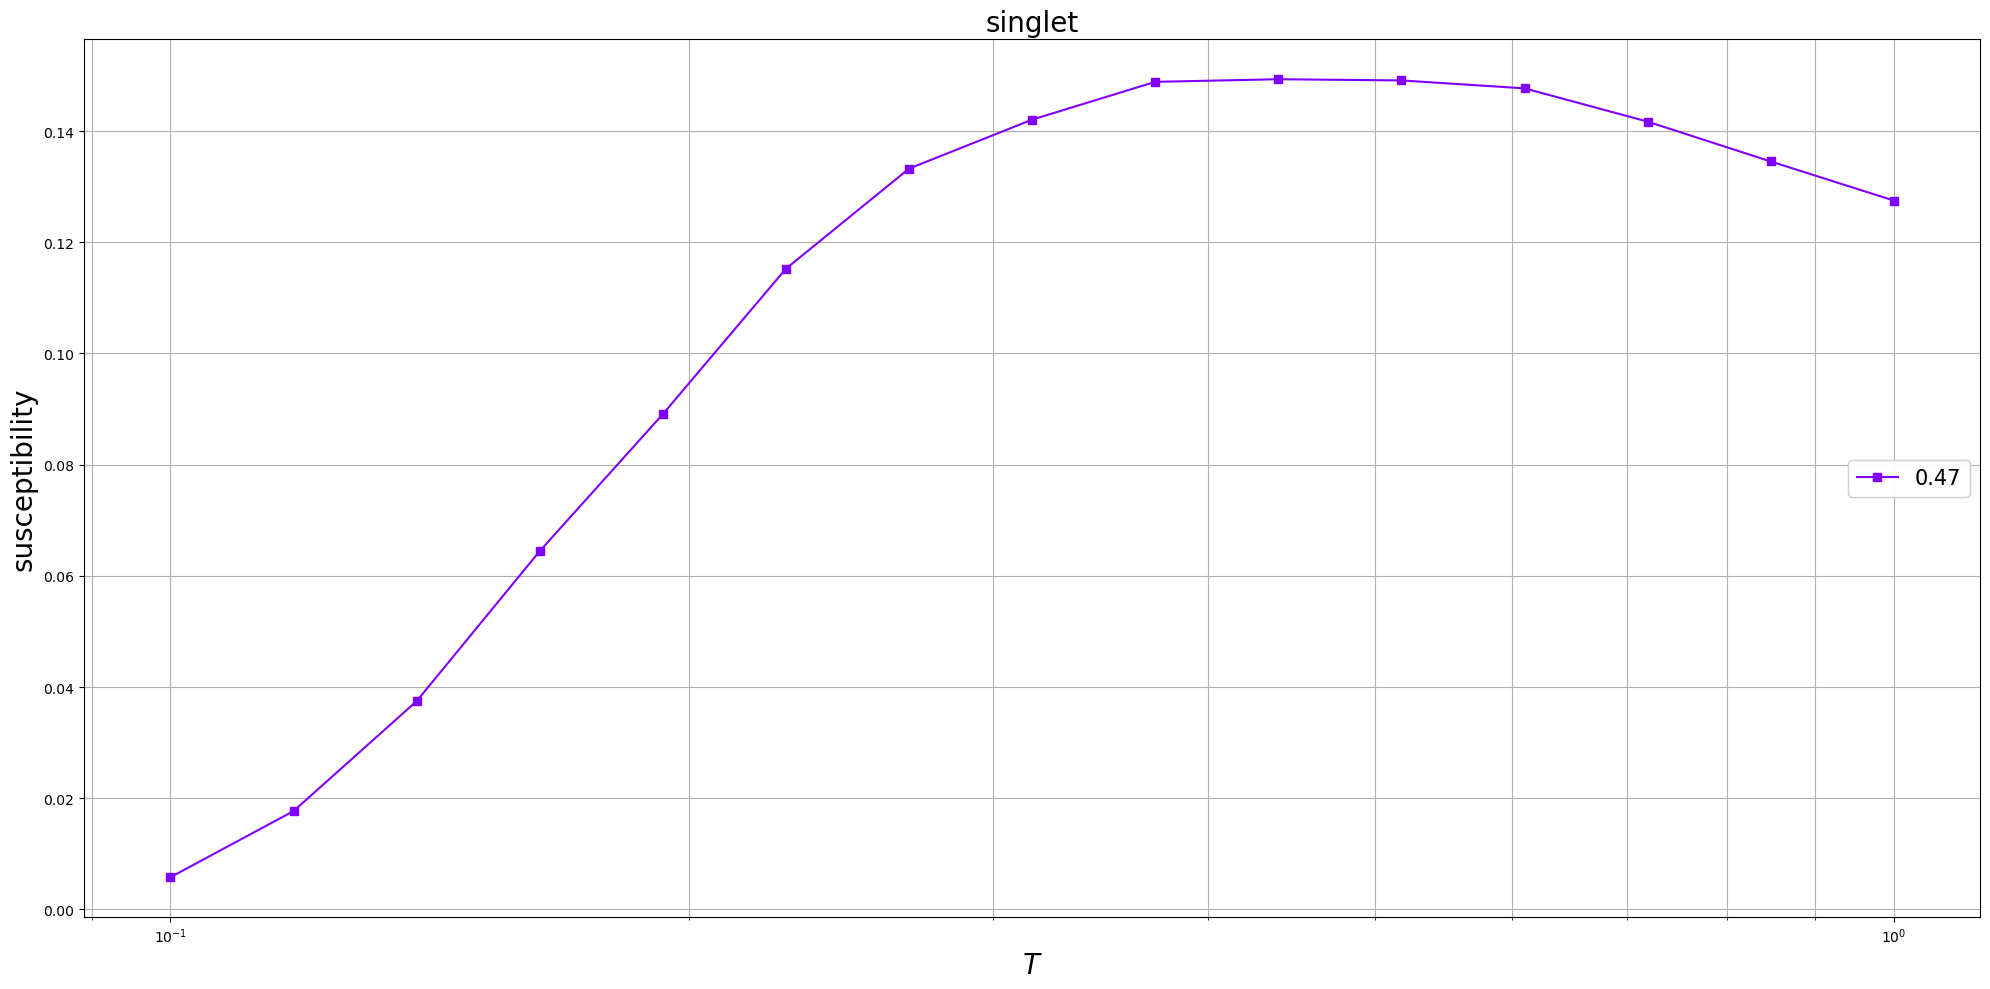

In [66]:
dfs = {lat : pd.DataFrame(df_susc[lat]) for lat in lats}
for key in dfs.keys():
    dfs[key].columns = np.round(dfs[key].columns, 3)



fig, ax = plt.subplots(1, 1, figsize=(20, 10))
# lat = "dimer_optim"
# J_list = [Js[0]-1E-4, Js[-1]+1E-4]
# gap = 1
# p1 = dfs[lat].plot(y = [(elem) for elem in dfs[lat].columns[::gap] if J_list[0] < elem <= J_list[1]],
#                         ax = ax[0], style='s-', colormap='rainbow')
# leg = ax[0].legend(handles=p1.legend().legendHandles, fontsize=15, loc="center right")
# ax[0].add_artist(leg)
# ax[0].set_xlabel(r'$T$', fontsize=20)
# ax[0].set_ylabel(r'$AS$', fontsize=20)
# ax[0].set_title("dimer_optim", fontsize=20)

lat = "singlet"
p1 = dfs[lat].plot(y = 0.47, ax = ax, style='s-', colormap='rainbow')
leg = ax.legend(handles=p1.legend().legendHandles, fontsize=15, loc="center right")
ax.add_artist(leg)
ax.set_xscale("log")
ax.set_xlabel(r'$T$', fontsize=20)
ax.set_ylabel(r'susceptibility', fontsize=20)
ax.set_title("singlet", fontsize=20)
ax.grid(which="both", ls="-")
save_fig(fig,f"images/SS", f"singlet_susc_J_0.47", 400, overwrite = True)

,0.470,0.475,0.480,0.485,0.490,0.495,0.500
0.100000,0.670780,1.094976,1.252760,1.307576,0.730131,1.301712,1.536272
0.117877,1.798120,2.319560,3.182944,2.558080,2.590144,3.265744,2.584312
0.138950,3.721760,3.817016,3.955264,4.390576,4.577264,4.616912,5.071224
0.163789,5.628432,5.395328,5.360688,5.384288,5.794408,5.455896,5.100224
0.193070,5.839216,6.437216,6.079208,6.090704,6.655016,5.740984,5.858416
0.227585,6.318672,6.563584,6.563960,6.224800,5.639328,6.055384,5.920624
0.268270,6.045328,5.928560,5.762224,5.798032,5.602944,5.541432,5.455304
0.316228,5.418368,5.608072,5.485256,5.342536,5.199584,5.119264,4.878120
0.372759,5.051896,5.060448,4.950176,5.065376,4.606936,4.652872,4.657152
0.439397,4.540976,4.589960,4.352472,4.442424,4.420000,4.333808,4.253368


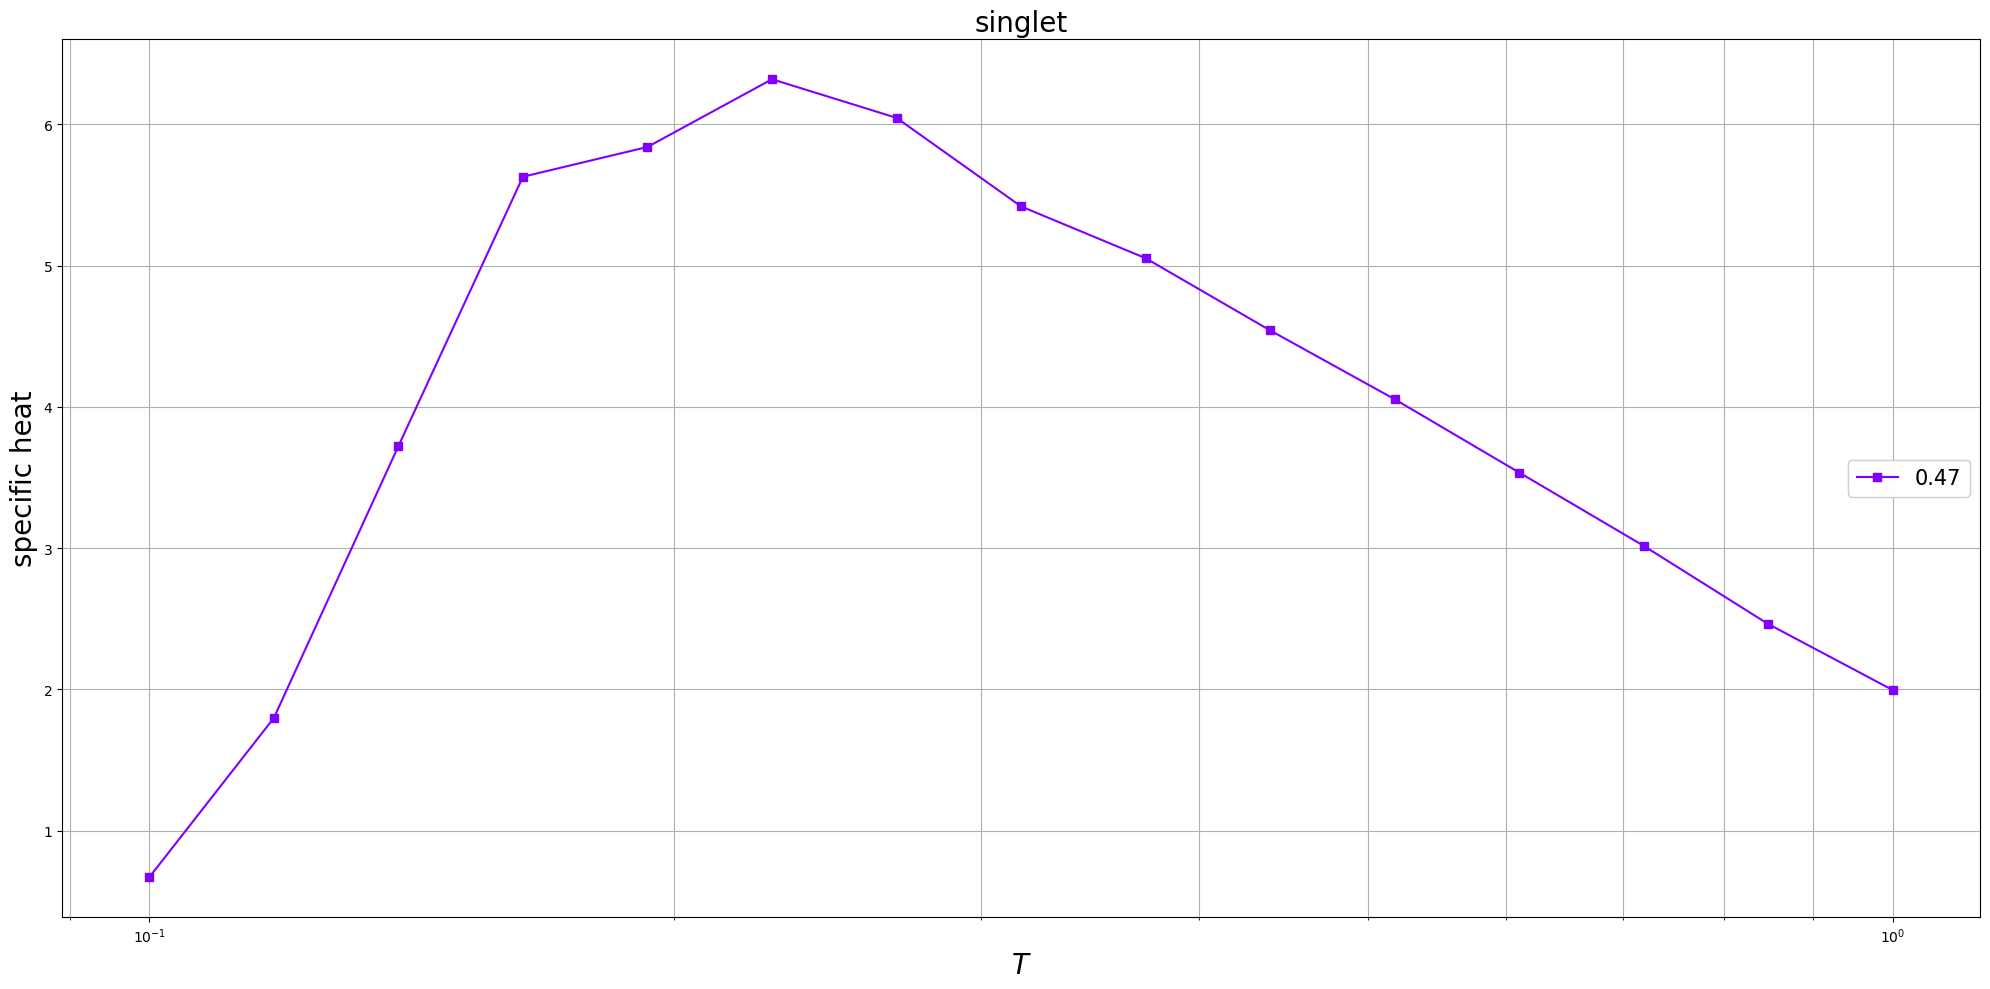

In [65]:
dfs = {lat : pd.DataFrame(df_cq[lat]) for lat in lats}
for key in dfs.keys():
    dfs[key].columns = np.round(dfs[key].columns, 3)



fig, ax = plt.subplots(1, 1, figsize=(20, 10))
# lat = "dimer_optim"
# J_list = [Js[0]-1E-4, Js[-1]+1E-4]
# gap = 1
# p1 = dfs[lat].plot(y = [(elem) for elem in dfs[lat].columns[::gap] if J_list[0] < elem <= J_list[1]],
#                         ax = ax[0], style='s-', colormap='rainbow')
# leg = ax[0].legend(handles=p1.legend().legendHandles, fontsize=15, loc="center right")
# ax[0].add_artist(leg)
# ax[0].set_xlabel(r'$T$', fontsize=20)
# ax[0].set_ylabel(r'$AS$', fontsize=20)
# ax[0].set_title("dimer_optim", fontsize=20)

lat = "singlet"
p1 = (dfs[lat] * 8).plot(y = 0.47, ax = ax, style='s-', colormap='rainbow')
leg = ax.legend(handles=p1.legend().legendHandles, fontsize=15, loc="center right")
ax.add_artist(leg)
ax.set_xscale("log")
ax.set_xlabel(r'$T$', fontsize=20)
ax.set_ylabel(r'specific heat', fontsize=20)
ax.set_title("singlet", fontsize=20)
ax.grid(which="both", ls="-")
save_fig(fig,f"images/SS", f"singlet_cq_J_0.47", 400, overwrite = True)